# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key

'1bce4c0df3b2293dfc66e783f97126f9'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [96]:
#URL and Units
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [97]:
#Develop query_url
query_url = weather_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1bce4c0df3b2293dfc66e783f97126f9&q=gorontalo&units=imperial'

In [98]:
# Run Test
example = city[0]
test_url = query_url + example
test_response = requests.get (test_url).json()
from pprint import pprint
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.5412, 'lon': 123.0595},
 'dt': 1614554535,
 'id': 1643837,
 'main': {'feels_like': 300.79,
          'grnd_level': 1010,
          'humidity': 83,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 297.6,
          'temp_max': 297.6,
          'temp_min': 297.6},
 'name': 'Gorontalo',
 'sys': {'country': 'ID', 'sunrise': 1614549436, 'sunset': 1614593003},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 21, 'speed': 1.69}}


In [99]:
#Test DataFrame
cities_df = pd.DataFrame({"City": cities})
cities_df. head()

,City
0,tuban
1,lompoc
2,new norfolk
3,butaritari
4,qaanaaq


In [126]:
# begin with Variables 
city_name = []
c_country = []
date =[]
c_lat =[]
c_lon =[]
temp = []
temp_max =[]
humid =[]
cloud =[]
wind =[]
i = 1


print (f"Beginning Data Retrival")
print ("-------------------------")
# Append List
for city in cities:
    city=city
    query_url = weather_url + "appid=" + weather_api_key + "&units=" + units +"&q=" + city
    w_json =requests.get(query_url).json()
    
    try:      
        city_name.append(w_json ["name"])
        c_country.append(w_json["sys"]["country"])
        date.append(w_json["dt"])
        c_lat.append(w_json["coord"]["lat"])
        c_lon.append(w_json ["coord"]["lon"])
        temp_max.append(w_json["main"]["temp_max"])
        #temp.append(w_json ["main"]["temp"])
        humid.append(w_json ["main"]["humidity"])
        cloud.append(w_json ["clouds"]["all"])
        wind.append(w_json ["wind"]["speed"])
        city_info = w_json["name"]
        print(f"Processing record {i} | {city_info}")
        i+=1
    except (KeyError):
        print(f"City Not found, Skipping.....")
            
        
        


Beginning Data Retrival
-------------------------
Processing record 1 | Tuban
Processing record 2 | Lompoc
Processing record 3 | New Norfolk
Processing record 4 | Butaritari
Processing record 5 | Qaanaaq
Processing record 6 | Morristown
Processing record 7 | Yangi Marg`ilon
Processing record 8 | Kushmurun
Processing record 9 | Fairbanks
Processing record 10 | Port Alfred
Processing record 11 | Busselton
Processing record 12 | City of San Pedro
Processing record 13 | Sørland
City Not found, Skipping.....
Processing record 14 | Eureka
Processing record 15 | Barrow
Processing record 16 | Takoradze
Processing record 17 | Altay
Processing record 18 | Dikson
Processing record 19 | Ponta do Sol
Processing record 20 | Coquimbo
Processing record 21 | Atuona
Processing record 22 | Rikitea
Processing record 23 | Emba
Processing record 24 | Carnarvon
Processing record 25 | Thompson
Processing record 26 | Hofn
Processing record 27 | Salinas
Processing record 28 | Nāzirā
City Not found, Skipping....

Processing record 232 | Airai
Processing record 233 | Pokhara
Processing record 234 | Kanungu
Processing record 235 | Nehe
Processing record 236 | Wilkie
Processing record 237 | Nālūt
Processing record 238 | Galle
Processing record 239 | Assomada
Processing record 240 | Grand Gaube
Processing record 241 | Yenagoa
Processing record 242 | Dubbo
Processing record 243 | Havøysund
Processing record 244 | Srednekolymsk
Processing record 245 | Vyartsilya
Processing record 246 | Plainview
Processing record 247 | Panama City
Processing record 248 | Port-Cartier
Processing record 249 | Saldanha
Processing record 250 | Yumen
Processing record 251 | Dire Dawa
Processing record 252 | Shihezi
Processing record 253 | Cururupu
Processing record 254 | Āsosa
Processing record 255 | Bichura
Processing record 256 | Kampong Cham
City Not found, Skipping.....
City Not found, Skipping.....
Processing record 257 | Noumea
Processing record 258 | Kandrian
Processing record 259 | Antalaha
Processing record 260 |

Processing record 458 | Healdsburg
Processing record 459 | Narón
Processing record 460 | São Paulo de Olivença
Processing record 461 | São Miguel do Araguaia
Processing record 462 | Suntar
Processing record 463 | Lao Cai
Processing record 464 | Ochakiv
Processing record 465 | Korla
Processing record 466 | Mil'kovo
Processing record 467 | Narāyangarh
Processing record 468 | Namatanai
Processing record 469 | Gemeente Wageningen
Processing record 470 | Hargeisa
Processing record 471 | Wenling
Processing record 472 | Hecun
Processing record 473 | Houston
Processing record 474 | Catacamas
Processing record 475 | Vytegra
Processing record 476 | Hasaki
Processing record 477 | Shaowu
Processing record 478 | Samarai
Processing record 479 | Valparaíso
Processing record 480 | Pevek
Processing record 481 | Beïnamar
Processing record 482 | Morant Bay
Processing record 483 | Lázaro Cárdenas
Processing record 484 | Lere
Processing record 485 | Isangel
Processing record 486 | Say
Processing record 487

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [128]:
# Convert to Dataframe
weather_d= {'City Name': city_name,'Country': c_country,'Cloudiness': cloud,'Lat':c_lat,'Long':c_lon,'Humidity':humid,'Windspeed':wind,'Temperature': temp_max}
weather_df =pd.DataFrame(weather_d, columns=('City Name','Country','Cloudiness','Lat','Long','Humidity', 'Windspeed','Temperature'))
weather_df

,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
0,Tuban,ID,52,-6.8976,112.0649,81,3.18,79.14
1,Lompoc,US,20,34.6391,-120.4579,16,12.66,69.80
2,New Norfolk,AU,65,-42.7826,147.0587,83,5.01,64.99
3,Butaritari,KI,98,3.0707,172.7902,83,10.98,80.55
4,Qaanaaq,GL,90,77.4840,-69.3632,82,2.62,-5.53
...,...,...,...,...,...,...,...,...
594,Posse,BR,99,-14.0931,-46.3694,92,6.38,68.36
595,Ayagoz,KZ,100,47.9714,80.4392,91,8.39,17.62
596,Berezovyy,RU,28,51.6667,135.7000,80,7.02,-3.48
597,Omboué,GA,100,-1.5746,9.2618,86,4.34,78.73


In [153]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [130]:
#Find out if any city has above 100% humididty
test_humidity = weather_df["Humidity"].describe(include = "all")
print("No cities have over 100% humidity in data")
test_humidity

No cities have over 100% humidity in data


count    599.000000
mean      73.397329
std       20.738757
min        6.000000
25%       65.000000
50%       79.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [131]:
#  Get the indices of cities that have humidity over 100%.


In [132]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

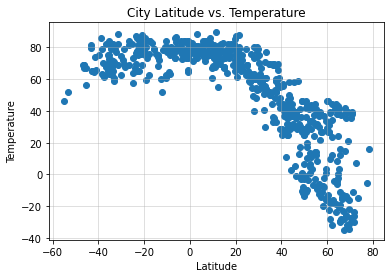

In [133]:
plt.scatter(weather_df["Lat"], weather_df["Temperature"])
plt.title(f"City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevs.Temperature.png")
plt.show

          

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

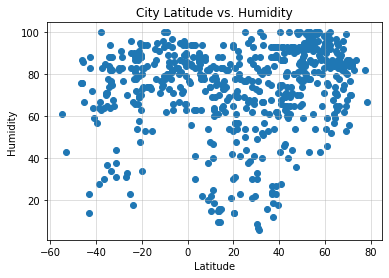

In [134]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.title(f"City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevshumidity.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

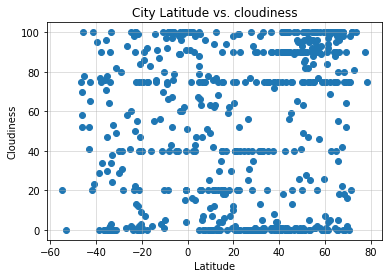

In [135]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.title(f"City Latitude vs. cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevscloud.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

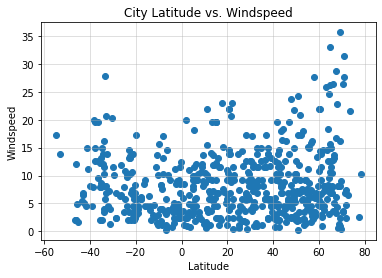

In [136]:
plt.scatter(weather_df["Lat"], weather_df["Windspeed"])
plt.title(f"City Latitude vs. Windspeed")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevswind.png")
plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [137]:
northern = weather_df.loc[weather_df["Lat"] >= 0]
northern


,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
1,Lompoc,US,20,34.6391,-120.4579,16,12.66,69.80
3,Butaritari,KI,98,3.0707,172.7902,83,10.98,80.55
4,Qaanaaq,GL,90,77.4840,-69.3632,82,2.62,-5.53
5,Morristown,US,90,36.2140,-83.2949,68,11.50,69.80
6,Yangi Marg`ilon,UZ,1,40.4272,71.7189,74,2.30,28.40
...,...,...,...,...,...,...,...,...
592,Griffith,US,90,41.5284,-87.4237,87,19.57,41.00
593,Yurga,RU,100,55.7231,84.8861,95,8.70,8.58
595,Ayagoz,KZ,100,47.9714,80.4392,91,8.39,17.62
596,Berezovyy,RU,28,51.6667,135.7000,80,7.02,-3.48


In [138]:
southern = weather_df.loc[weather_df["Lat"] < 0]
southern


,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
0,Tuban,ID,52,-6.8976,112.0649,81,3.18,79.14
2,New Norfolk,AU,65,-42.7826,147.0587,83,5.01,64.99
9,Port Alfred,ZA,3,-33.5906,26.8910,77,27.81,71.33
10,Busselton,AU,100,-33.6500,115.3333,76,4.00,64.99
19,Coquimbo,CL,40,-29.9533,-71.3436,82,11.50,62.60
...,...,...,...,...,...,...,...,...
583,São Félix do Xingu,BR,97,-6.6447,-51.9950,93,0.27,73.65
585,Poum,NC,3,-20.2333,164.0167,70,8.23,80.47
591,Rawson,AR,41,-43.3002,-65.1023,23,5.50,79.52
594,Posse,BR,99,-14.0931,-46.3694,92,6.38,68.36


In [139]:
s_latx = southern['Lat']
s_tempy = southern ['Temperature']

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

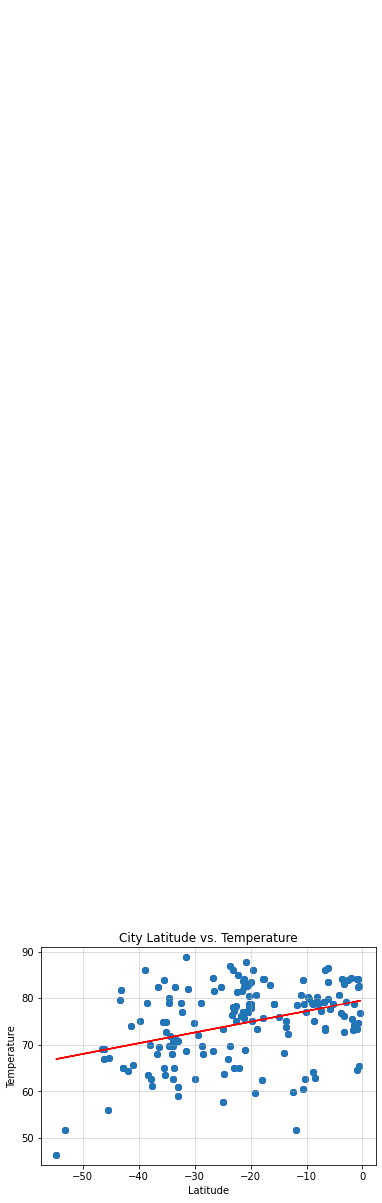

In [140]:
plt.scatter(southern["Lat"], southern["Temperature"], facecolor ="blue")
plt.title(f"City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latx, s_tempy)
regress_values = s_latx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_latx,s_tempy)
plt.plot(s_latx,regress_values,"r-")
plt.annotate(line_eq,(-30,290),fontsize=15,color="red")
plt.show


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [141]:
n_humidx = northern['Humidity']
n_laty = northern ['Lat']

<function matplotlib.pyplot.show(close=None, block=None)>

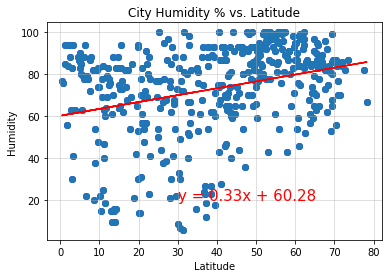

In [142]:
plt.scatter(northern["Lat"], northern["Humidity"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_laty,n_humidx)
regress_values = n_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_laty,n_humidx,)
plt.plot(n_laty,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [143]:
s_humidx = southern['Lat']
s_humidy = southern['Humidity']

<function matplotlib.pyplot.show(close=None, block=None)>

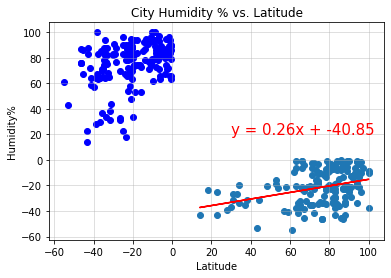

In [144]:
plt.scatter(southern["Lat"], southern["Humidity"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_humidy,s_humidx)
regress_values = s_humidy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_humidy,s_humidx,)
plt.plot(s_humidy,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [145]:
n_cloudx = northern['Cloudiness']
n_laty = northern ['Lat']

<function matplotlib.pyplot.show(close=None, block=None)>

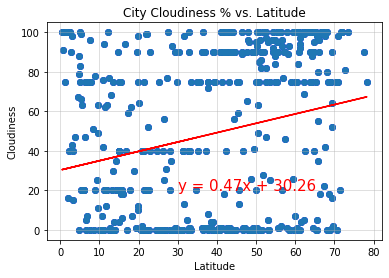

In [146]:
plt.scatter(northern["Lat"], northern["Cloudiness"], facecolor ="blue")
plt.title(f"City Cloudiness % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_laty,n_cloudx)
regress_values = n_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_laty,n_cloudx,)
plt.plot(n_laty,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [147]:
s_cloudy = southern['Cloudiness']
s_laty = southern ['Lat']

<function matplotlib.pyplot.show(close=None, block=None)>

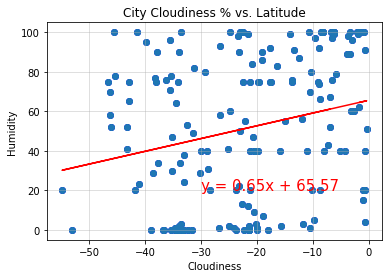

In [148]:
plt.scatter(southern["Lat"], southern["Cloudiness"], facecolor ="blue")
plt.title(f"City Cloudiness % vs. Latitude")
plt.xlabel('Cloudiness')
plt.ylabel('Humidity')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_laty,s_cloudy)
regress_values = s_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_laty,s_cloudy,)
plt.plot(s_laty,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [149]:
n_windx = northern['Windspeed']
n_laty = northern ['Lat']

<function matplotlib.pyplot.show(close=None, block=None)>

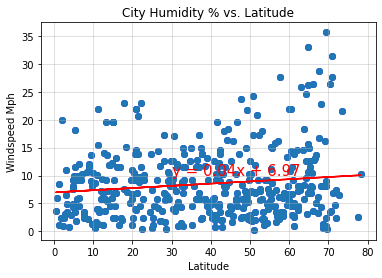

In [150]:
plt.scatter(northern["Lat"], northern["Windspeed"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed Mph')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_laty,n_windx)
regress_values = n_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_laty,n_windx,)
plt.plot(n_laty,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [151]:
s_windy = southern['Windspeed']
s_laty = southern ['Lat']

<function matplotlib.pyplot.show(close=None, block=None)>

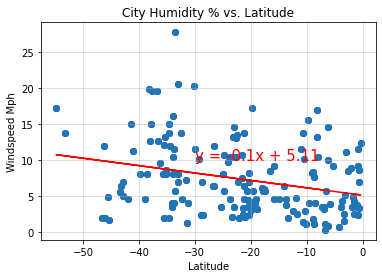

In [152]:
plt.scatter(southern["Lat"], southern["Windspeed"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed Mph')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_laty,s_windy)
regress_values = s_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_laty,s_windy,)
plt.plot(s_laty,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.show